## Data Diri
* Nama : Febby Ariyanti Herdiana
* Grup : M06

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"febbyariyanti01","key":"9e5a11195940e22660ae4231b2006d1f"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
import os, zipfile, shutil

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout, Conv2D

import matplotlib.pyplot as plt

In [5]:
!kaggle datasets download -d viratkothari/animal10

 99% 577M/585M [00:29<00:00, 37.6MB/s]
100% 585M/585M [00:29<00:00, 20.6MB/s]


In [6]:
local_zip = '/content/animal_class.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
main_dir = os.path.join('/content/Animals-10')
print(os.listdir(main_dir))

['chicken', 'butterfly', 'sheep', 'dog', 'cat', 'cow', 'horse', 'spider', 'squirrel', 'elephant']


In [8]:
from PIL import Image
samples = 0

for x in os.listdir(main_dir):
  dir = os.path.join('/content/Animals-10', x)
  y = len(os.listdir(dir))
  print(x+' :', y)
  samples = samples + y
  
  image_name = os.listdir(dir)
  for z in range(3):
    image_path = os.path.join(dir, image_name[z])
    image = Image.open(image_path)
    print(image.size)
  print()


print('Total Sample : ', samples)

chicken : 3098
(225, 300)
(225, 300)
(300, 166)

butterfly : 2112
(640, 426)
(300, 225)
(300, 188)

sheep : 1820
(640, 301)
(300, 225)
(300, 200)

dog : 4863
(300, 269)
(300, 194)
(300, 185)

cat : 1668
(297, 300)
(640, 442)
(640, 426)

cow : 1866
(300, 143)
(300, 200)
(300, 159)

horse : 2623
(300, 200)
(300, 225)
(300, 225)

spider : 4821
(300, 184)
(300, 200)
(300, 221)

squirrel : 1862
(225, 300)
(300, 200)
(300, 225)

elephant : 1446
(300, 211)
(300, 196)
(300, 200)

Total Sample :  26179


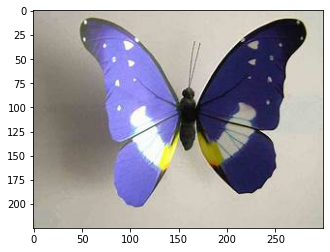

In [9]:
%matplotlib inline

from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = image.load_img('/content/Animals-10/butterfly/butterfly (1).jpeg')
imgplot = plt.imshow(img)

In [10]:
ignore_dir = ['butterfly', 'sheep', 'dog', 'cat', 'cow', 'squirrel', 'elephant']

for dir in ignore_dir:
  path = os.path.join(main_dir, dir)
  shutil.rmtree(path)

print(os.listdir(main_dir))

['chicken', 'horse', 'spider']


In [11]:
from PIL import Image
samples = 0

for x in os.listdir(main_dir):
  dir = os.path.join('/content/Animals-10', x)
  y = len(os.listdir(dir))
  print(x+' :', y)
  samples = samples + y
  
  image_name = os.listdir(dir)
  for z in range(3):
    image_path = os.path.join(dir, image_name[z])
    image = Image.open(image_path)
    print(image.size)
  print()


print('Total Sample : ', samples)

chicken : 3098
(225, 300)
(225, 300)
(300, 166)

horse : 2623
(300, 200)
(300, 225)
(300, 225)

spider : 4821
(300, 184)
(300, 200)
(300, 221)

Total Sample :  10542


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='validation')

Found 8435 images belonging to 3 classes.
Found 2107 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3))),
model.add(MaxPooling2D(2, 2)),
model.add(Conv2D(64, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),
model.add(Conv2D(128, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),
model.add(Conv2D(128, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),
model.add(Flatten()),
model.add(Dense(512, activation='relu')),
model.add(Dense(3, activation='softmax')),

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') and logs.get('val_accuracy') > 0.92):
      print("\n The accuracy rate was above 92%!")
      self.model.stop_training = True
callbacks = Callback()

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[callbacks])

Epoch 1/50
66/66 - 65s - loss: 0.9666 - accuracy: 0.5186 - val_loss: 0.7381 - val_accuracy: 0.6920 - 65s/epoch - 978ms/step
Epoch 2/50
66/66 - 59s - loss: 0.6026 - accuracy: 0.7485 - val_loss: 0.5006 - val_accuracy: 0.8030 - 59s/epoch - 896ms/step
Epoch 3/50
66/66 - 60s - loss: 0.4712 - accuracy: 0.8153 - val_loss: 0.4576 - val_accuracy: 0.8230 - 60s/epoch - 909ms/step
Epoch 4/50
66/66 - 59s - loss: 0.3952 - accuracy: 0.8496 - val_loss: 0.3787 - val_accuracy: 0.8552 - 59s/epoch - 897ms/step
Epoch 5/50
66/66 - 59s - loss: 0.3620 - accuracy: 0.8606 - val_loss: 0.3905 - val_accuracy: 0.8514 - 59s/epoch - 889ms/step
Epoch 6/50
66/66 - 60s - loss: 0.3206 - accuracy: 0.8781 - val_loss: 0.3466 - val_accuracy: 0.8652 - 60s/epoch - 902ms/step
Epoch 7/50
66/66 - 59s - loss: 0.3088 - accuracy: 0.8826 - val_loss: 0.3172 - val_accuracy: 0.8813 - 59s/epoch - 894ms/step
Epoch 8/50
66/66 - 59s - loss: 0.2939 - accuracy: 0.8869 - val_loss: 0.2837 - val_accuracy: 0.8965 - 59s/epoch - 893ms/step
Epoch 9/

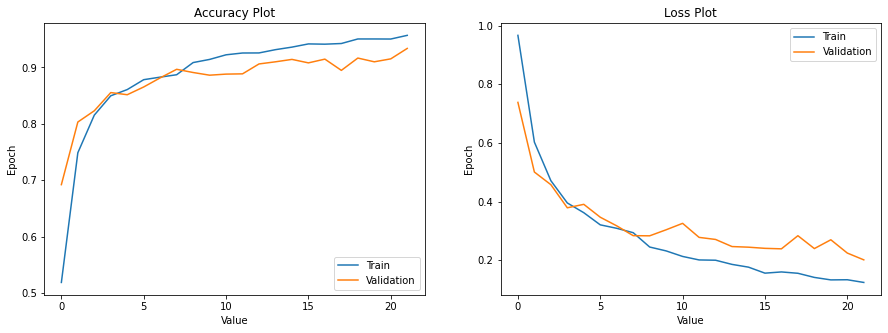

In [ ]:
figure = plt.figure(figsize = (15, 5))

figure.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.xlabel('Value')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')

figure.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.xlabel('Value')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)